In [33]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=2.5)

# find NULL Data
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew 

In [34]:
# dataset
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
ids = df_test['Id'].values

In [35]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
# NaN data
for col in df_train.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
print("_"*50 + "\n")
for col in df_test.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

columns:         Id	 Percent of NaN value: 0.00%
columns: MSSubClass	 Percent of NaN value: 0.00%
columns:   MSZoning	 Percent of NaN value: 0.00%
columns: LotFrontage	 Percent of NaN value: 17.74%
columns:    LotArea	 Percent of NaN value: 0.00%
columns:     Street	 Percent of NaN value: 0.00%
columns:      Alley	 Percent of NaN value: 93.77%
columns:   LotShape	 Percent of NaN value: 0.00%
columns: LandContour	 Percent of NaN value: 0.00%
columns:  Utilities	 Percent of NaN value: 0.00%
columns:  LotConfig	 Percent of NaN value: 0.00%
columns:  LandSlope	 Percent of NaN value: 0.00%
columns: Neighborhood	 Percent of NaN value: 0.00%
columns: Condition1	 Percent of NaN value: 0.00%
columns: Condition2	 Percent of NaN value: 0.00%
columns:   BldgType	 Percent of NaN value: 0.00%
columns: HouseStyle	 Percent of NaN value: 0.00%
columns: OverallQual	 Percent of NaN value: 0.00%
columns: OverallCond	 Percent of NaN value: 0.00%
columns:  YearBuilt	 Percent of NaN value: 0.00%
columns: Yea

<AxesSubplot:>

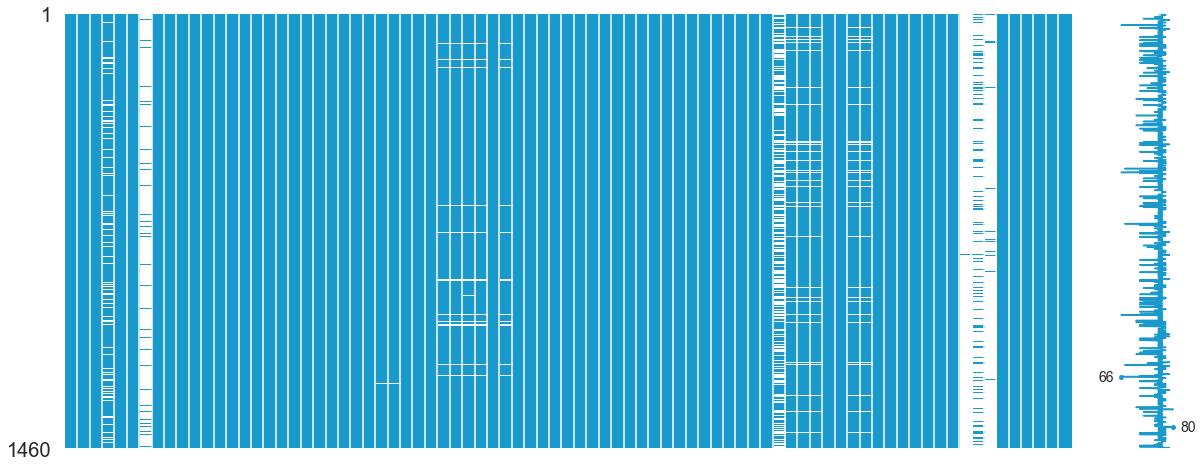

In [37]:
msno.matrix(df=df_train.iloc[:, :], figsize=(20, 8), color=(0.1, 0.6, 0.8))

<AxesSubplot:>

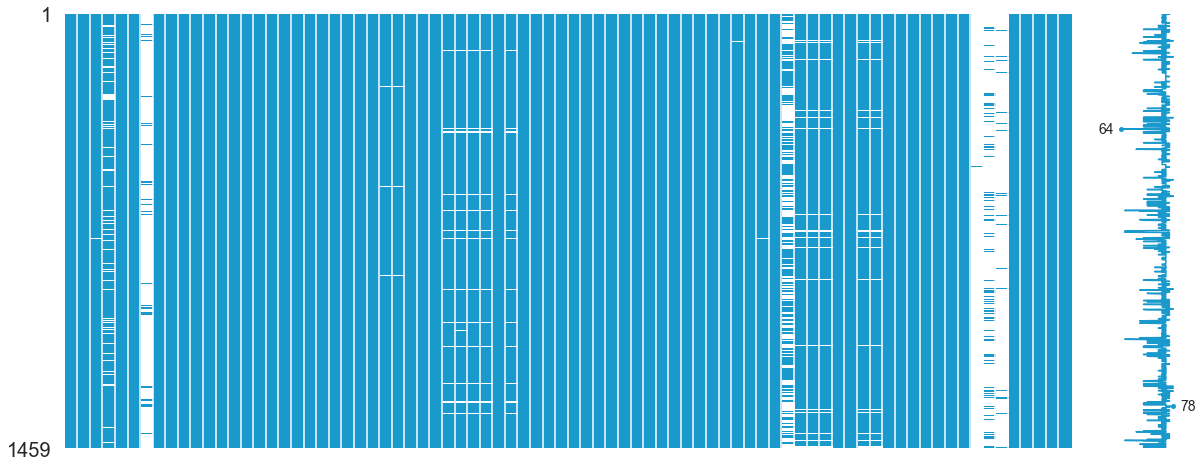

In [38]:
msno.matrix(df=df_test.iloc[:, :], figsize=(20, 8), color=(0.1, 0.6, 0.8))

In [39]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [40]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

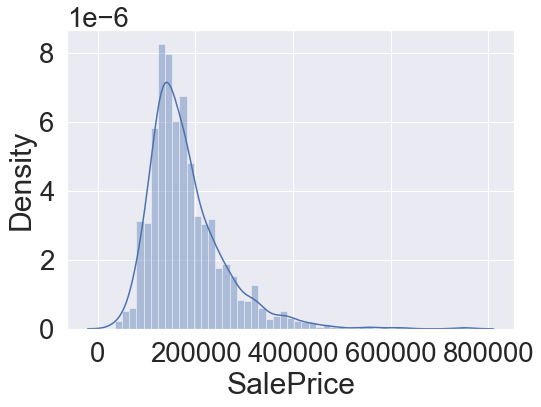

In [41]:
sns.distplot(df_train['SalePrice'])

In [42]:
x_train = df_train.drop('SalePrice', 1)
y_train = df_train.SalePrice.values

In [43]:
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

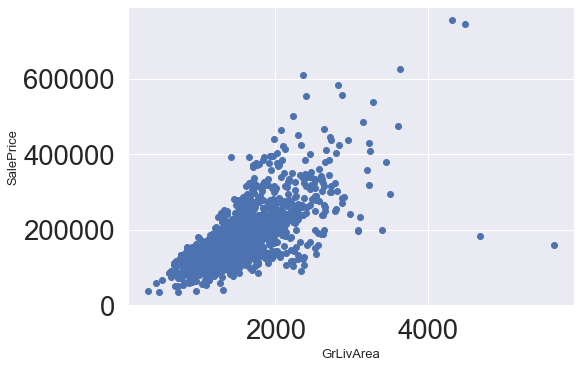

In [44]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

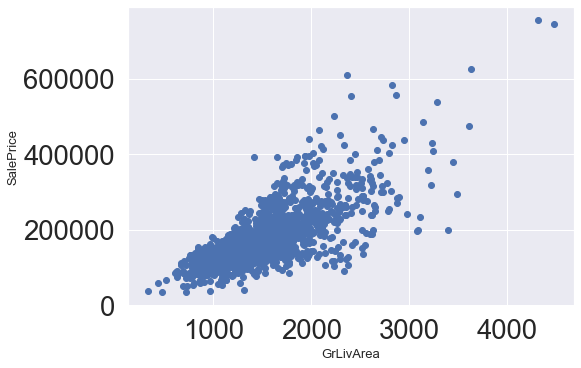

In [45]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

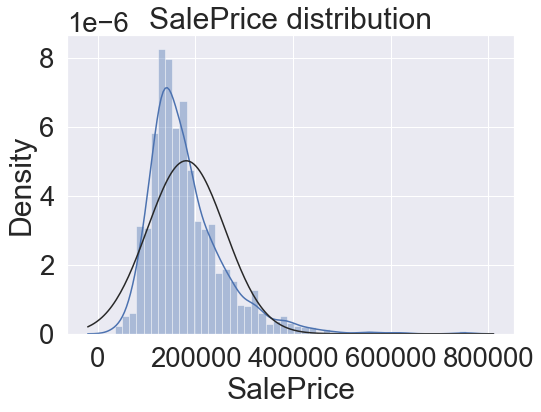

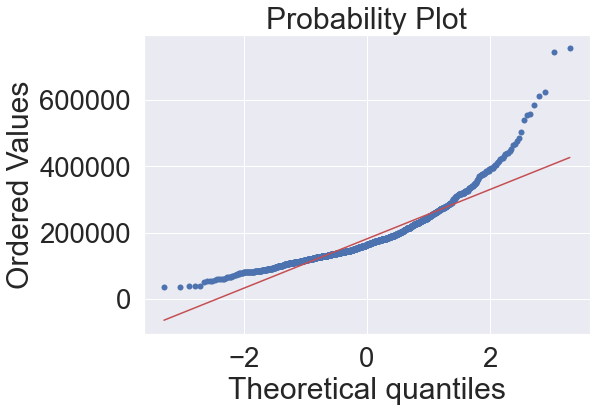

In [46]:
res = sns.distplot(df_train['SalePrice'] , fit=norm)
res.set_title("SalePrice distribution")

# qq plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

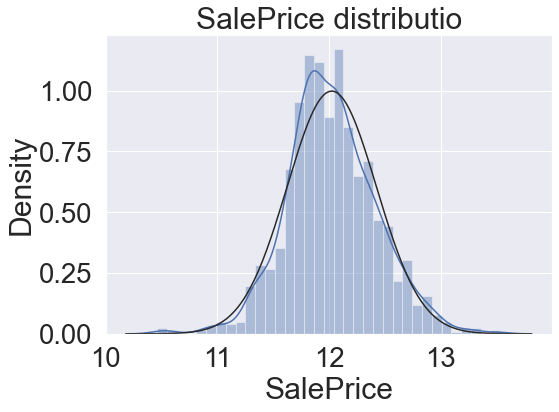

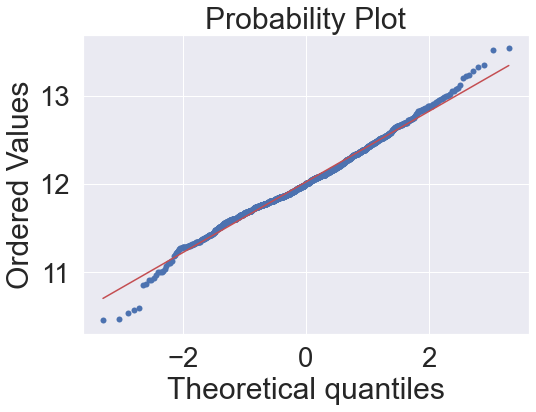

In [47]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"]) #로그 변환
res = sns.distplot(df_train['SalePrice'] , fit=norm)
res.set_title("SalePrice distributio")

# qq plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## Feature Engineering

In [48]:
# dataset
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
ids = df_test['Id'].values

In [49]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 80)


In [50]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


Text(0, 0.5, 'Percent of missing data by feature')

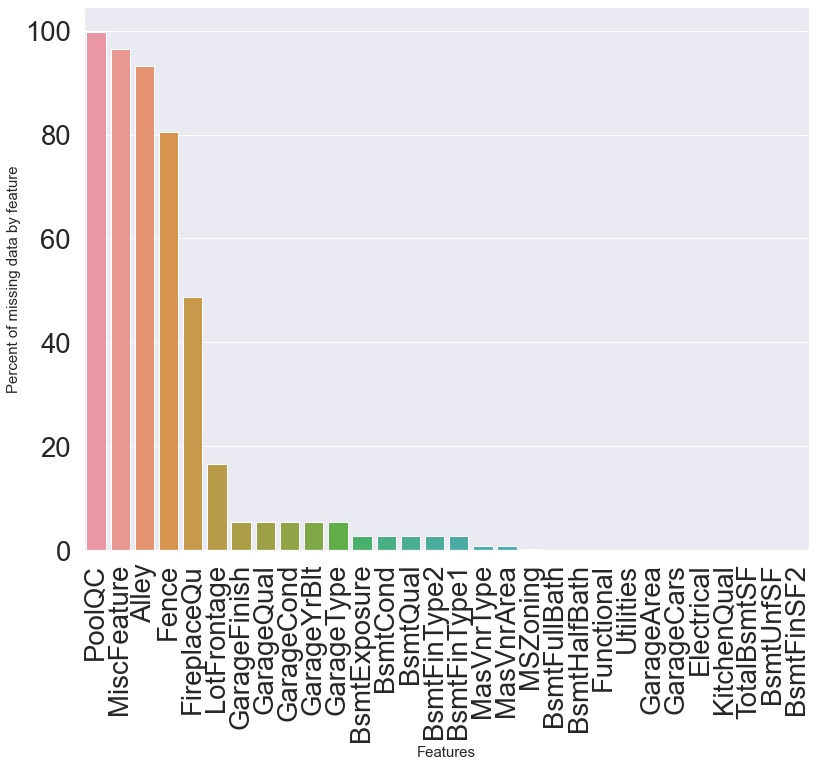

In [51]:
f, ax = plt.subplots(figsize=(13, 10))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.ylabel('Percent of missing data by feature', fontsize=15)

In [52]:
int_data = []
for i in df_train.columns:
    if type(df_train[i][0]) == type(df_train['SalePrice'][0]):
        int_data.append(i)
        
heatmap_data = df_train[int_data]

In [53]:
heatmap_d1 = heatmap_data.iloc[:, :len(int_data)//2]
heatmap_d1['SalePrice'] = df_train['SalePrice']
heatmap_d2 = heatmap_data.iloc[:, len(int_data)//2:]

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

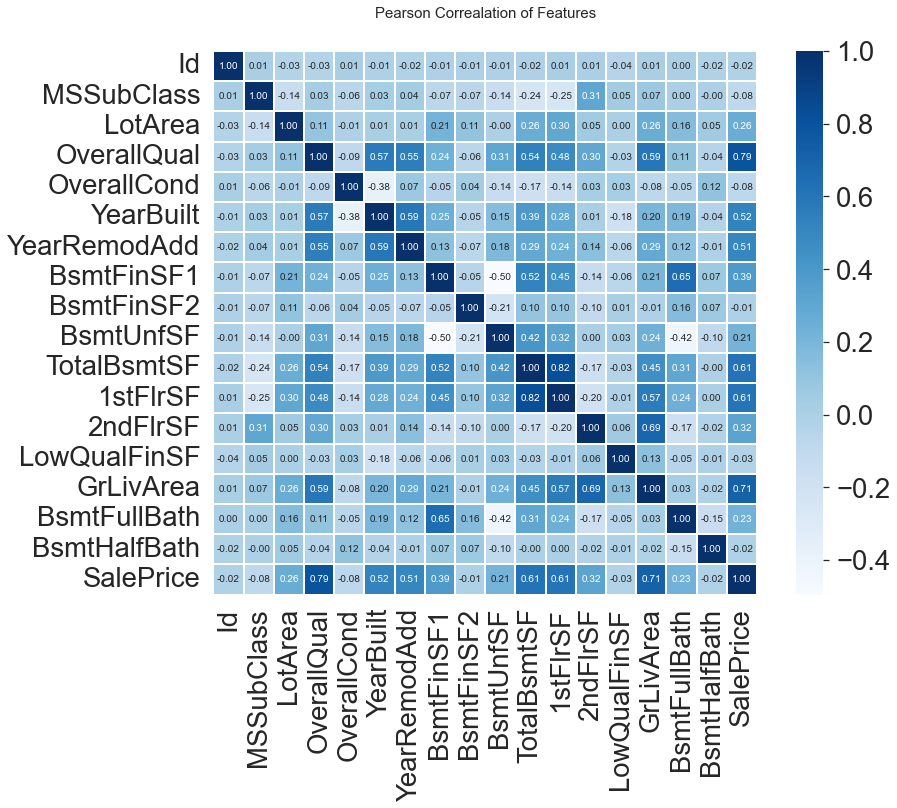

In [54]:
colormap = plt.cm.Blues
plt.figure(figsize=(14, 10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_d1.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':10}, fmt='.2f')

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

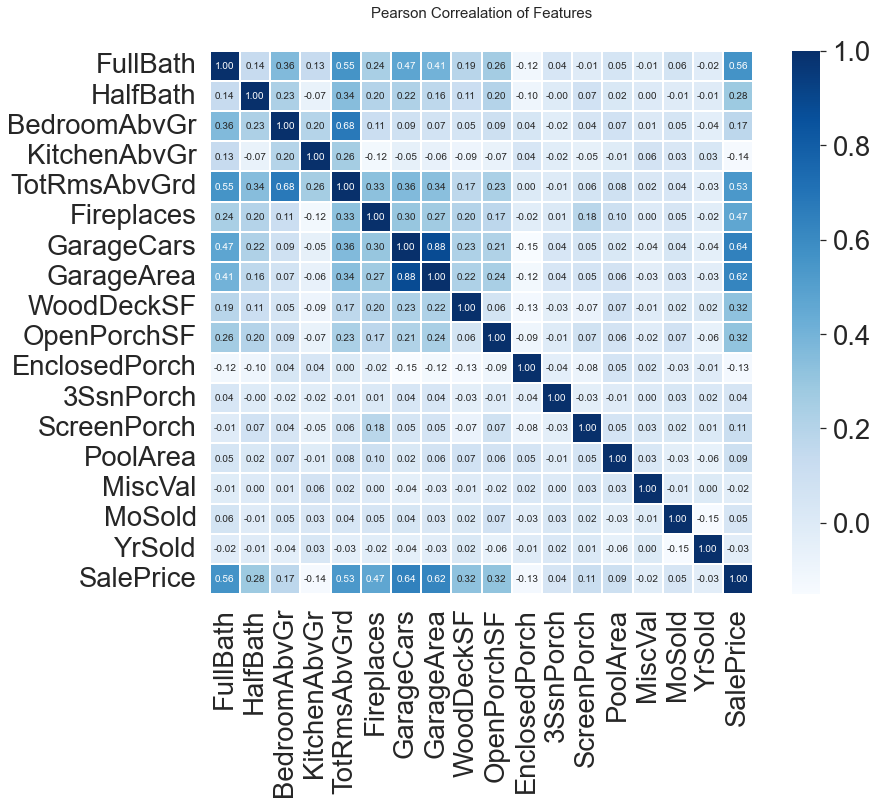

In [55]:
colormap = plt.cm.Blues
plt.figure(figsize=(14, 10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_d2.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':10}, fmt='.2f')

## Inputing missing values

In [56]:
all_data['PoolQC'].fillna("None", inplace=True)
all_data['PoolQC'].isnull().sum()

0

In [57]:
all_data['MiscFeature'].fillna("None", inplace=True)
all_data['MiscFeature'].isnull().sum()

0

In [58]:
all_data['Alley'].fillna("None", inplace=True)
all_data['Alley'].isnull().sum()

0

In [59]:
all_data['Fence'].fillna("None", inplace=True)
all_data['Fence'].isnull().sum()

0

In [60]:
all_data['FireplaceQu'].fillna("None", inplace=True)
all_data['FireplaceQu'].isnull().sum()

0

In [61]:
all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
all_data['LotFrontage'].isnull().sum()

0

In [62]:
cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
all_data[cols] = all_data[cols].fillna('None')
all_data[cols].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [63]:
all_data[cols] = all_data[cols].fillna('None')
all_data[cols].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [64]:
cols = ['GarageYrBlt', 'GarageArea', 'GarageCars']
all_data[cols] = all_data[cols].fillna(0)
all_data[cols].isnull().sum()

GarageYrBlt    0
GarageArea     0
GarageCars     0
dtype: int64

In [65]:
cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
all_data[cols] = all_data[cols].fillna(0)
all_data[cols].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [66]:
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
all_data[cols] = all_data[cols].fillna('None')
all_data[cols].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [67]:
all_data["MasVnrType"].fillna("None", inplace=True)
all_data["MasVnrArea"].fillna(0, inplace=True)
all_data[["MasVnrType", "MasVnrArea"]].isnull().sum()

MasVnrType    0
MasVnrArea    0
dtype: int64

In [68]:
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0], inplace=True)
all_data["MSZoning"].isnull().sum()

0

In [69]:
all_data.drop(['Utilities'], axis=1, inplace=True)

In [70]:
all_data["Functional"].fillna("Typ", inplace=True)
all_data["Functional"].isnull().sum()

0

In [71]:
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0], inplace=True)
all_data['Electrical'].isnull().sum()

0

In [72]:
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0], inplace=True)
all_data['KitchenQual'].isnull().sum()

0

In [73]:
cols = ['Exterior1st', 'Exterior2nd']
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0], inplace=True)
all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0], inplace=True)
all_data[cols].isnull().sum()

Exterior1st    0
Exterior2nd    0
dtype: int64

In [74]:
all_data['SaleType'].fillna(all_data['SaleType'].mode()[0], inplace=True)
all_data['SaleType'].isnull().sum()

0

In [75]:
all_data['MSSubClass'].fillna("None", inplace=True)
all_data['MSSubClass'].isnull().sum()

0

In [76]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [77]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [78]:
all_data.shape

(2919, 79)

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [81]:
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 79)


In [82]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [83]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [84]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 60 skewed numerical features to Box Cox transform


In [85]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 222)


In [86]:
df_train = all_data[:ntrain]
df_test = all_data[ntrain:]

### Model development

In [96]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [97]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, df_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [98]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [91]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [100]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [108]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [109]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 27008.4129 (5618.4476)


In [110]:
stacked_averaged_models.fit(df_train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(df_train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(df_test.values))
print(rmsle(y_train, stacked_train_pred))

15234.168361723532


In [102]:
model_xgb.fit(df_train, y_train)
xgb_train_pred = model_xgb.predict(df_train)
xgb_pred = np.expm1(model_xgb.predict(df_test))
print(rmsle(y_train, xgb_train_pred))

[17:18:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


3338.7155732742835


In [104]:
model_lgb.fit(df_train, y_train)
lgb_train_pred = model_lgb.predict(df_train)
lgb_pred = np.expm1(model_lgb.predict(df_test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
13028.590161028547


In [111]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [113]:
sub = pd.DataFrame()
sub['Id'] = ids
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)